In [1]:
import sys

import rdkit # required for cheminformatics functionality (small molecules)
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs

import numpy as np
np.set_printoptions(threshold=sys.maxsize)

In [2]:
# load the molecules
with open("../data/kegg_classes.txt") as f:
    mols_str, classes = zip(*[ line.strip().split() for line in f])

In [3]:
# encode each molecule using deep smiles
import deepsmiles
print("DeepSMILES version: %s" % deepsmiles.__version__)

converter = deepsmiles.Converter(rings=True, branches=True)

# a list of deep smiles per molecule
deep_smiles_enc = [ converter.encode(m) for m in mols_str ]

DeepSMILES version: 1.0.1


In [6]:
deep_smiles_enc

['CC=O)C=O)O',
 'CC=O)SCCNC=O)CCNC=O)CO)CC)C)COP=O)O)OP=O)O)OCCOCncnccN)ncnc69)))))))))CO)C5OP=O)O)O',
 'OCCOCO)CO)CO)C6O',
 'CC=O)O',
 'O=CO)CC=O)C=O)O',
 'CcnccC[n+]cscCCOP=O)O)OP=O)O)O)))))))c5C)))))))cN)n6',
 'C=COP=O)O)O)))C=O)O',
 'CC=O',
 'O=PO)O)OCOCCO))CO)CO)C6O',
 'O=CCO))COP=O)O)O',
 'O=CCO)COP=O)O)O',
 'CCO)C=O)O',
 'O=CO)CO)COP=O)O)O',
 'OCCOCO)CO)CO)C6O',
 'O=COP=O)O)O)))CO)COP=O)O)O',
 'OCCOCO)CO)CO)C6O',
 'CCO',
 'O=CO)CCO))OP=O)O)O',
 'O=PO)O)OCCOCO)CO)CO)C6O',
 'O=CO)CCOP=O)O)O))))OP=O)O)O',
 'O=PO)O)OCCOCO)CO)CO)C6O',
 'OCcccccc6OCOCCO))CO)CO)C6O',
 'CcnccC[n+]cCC)O))scCCOP=O)O)OP=O)O)O)))))))c5C)))))))cN)n6',
 'O=PO)O)OCCOCO)CO))CO)C5O',
 'O=PO)O)OCCOCO)COP=O)O)O))))CO)C5O',
 'OCCOCOccccO)cc6)))))))CO)CO)C6O',
 'O=PO)O)OCCOCOccccO)cc6)))))))CO)CO)C6O',
 'O=PO)O)OCCOCOcccccc6CO)))))))))CO)CO)C6O',
 '[*]NC=O)CCCCCCCSS5',
 '[*]NC=O)CCCCCS)CCS',
 '[*]NC=O)CCCCCS)CCSCC)=O',
 'CC=O)C=O)O',
 'CC=O)SCCNC=O)CCNC=O)CO)CC)C)COP=O)O)OP=O)O)OCCOCncnccN)ncnc69)))))))))CO)C5OP=O)O

In [88]:
maxlen = 0
lengths = []

for elem in deep_smiles_enc:
    lengths.append(len(elem))
    if len(elem) > maxlen:
        maxlen = len(elem)

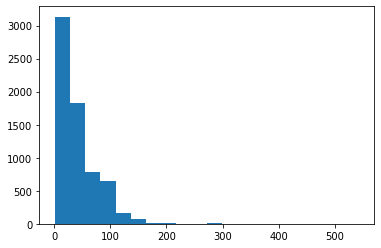

In [117]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.hist(lengths,bins=20)
plt.show()

In [8]:
maxlen

543

In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

Using TensorFlow backend.
/Users/gianluca/python_venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/gianluca/python_venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/gianluca/python_venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/gianluca/python_venv/lib/python3.7

In [16]:
deep_smiles_enc = np.array(deep_smiles_enc)

In [221]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 34
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 200
# This is fixed.
EMBEDDING_DIM = 20

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True, char_level=True)
tokenizer.fit_on_texts(deep_smiles_enc)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 34 unique tokens.


In [222]:
word_index

{'c': 1,
 ')': 2,
 'o': 3,
 '=': 4,
 'n': 5,
 '6': 6,
 'p': 7,
 '%': 8,
 '1': 9,
 '5': 10,
 '[': 11,
 ']': 12,
 '0': 13,
 's': 14,
 '9': 15,
 'h': 16,
 'l': 17,
 '4': 18,
 '*': 19,
 '-': 20,
 '7': 21,
 '3': 22,
 '+': 23,
 '2': 24,
 '8': 25,
 '#': 26,
 'f': 27,
 'm': 28,
 'b': 29,
 'g': 30,
 'r': 31,
 'e': 32,
 'i': 33,
 'z': 34}

In [242]:
X = tokenizer.texts_to_sequences(deep_smiles_enc)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (6669, 200)


In [243]:
X

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
         4,  3,  2,  1,  4,  3,  2,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)
X = X.reshape(X.shape[0],1,X.shape[1])

X_train, X_test, y_train, y_test = train_test_split(X, multi_class_output, test_size=0.2)

In [245]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [246]:
X.shape

(6669, 1, 200)

In [275]:
model = Sequential()
model.add(LSTM(128, input_shape=(X.shape[1], X.shape[2]), return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(11, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_50 (LSTM)               (None, 1, 128)            168448    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 128)            0         
_________________________________________________________________
lstm_51 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_40 (Dense)             (None, 11)                715       
Total params: 218,571
Trainable params: 218,571
Non-trainable params: 0
_________________________________________________________________
None


In [281]:
epochs = 200
batch_size = 8

history = model.fit(X_train, y_train, epochs=epochs,validation_split=0.2)

Train on 4268 samples, validate on 1067 samples
Epoch 1/200
4268/4268 [==============================] - 1s 196us/step - loss: 0.0650 - acc: 0.9755 - val_loss: 0.2942 - val_acc: 0.9272
Epoch 2/200
4268/4268 [==============================] - 1s 191us/step - loss: 0.0649 - acc: 0.9754 - val_loss: 0.2963 - val_acc: 0.9276
Epoch 3/200
4268/4268 [==============================] - 1s 196us/step - loss: 0.0660 - acc: 0.9747 - val_loss: 0.2963 - val_acc: 0.9260
Epoch 4/200
4268/4268 [==============================] - 1s 191us/step - loss: 0.0653 - acc: 0.9748 - val_loss: 0.2955 - val_acc: 0.9264
Epoch 5/200
4268/4268 [==============================] - 1s 205us/step - loss: 0.0625 - acc: 0.9765 - val_loss: 0.3014 - val_acc: 0.9261
Epoch 6/200
4268/4268 [==============================] - 1s 204us/step - loss: 0.0652 - acc: 0.9751 - val_loss: 0.3002 - val_acc: 0.9269
Epoch 7/200
4268/4268 [==============================] - 1s 194us/step - loss: 0.0636 - acc: 0.9762 - val_loss: 0.2992 - val_acc: 

4268/4268 [==============================] - 1s 197us/step - loss: 0.0497 - acc: 0.9825 - val_loss: 0.3280 - val_acc: 0.9286
Epoch 61/200
4268/4268 [==============================] - 1s 191us/step - loss: 0.0469 - acc: 0.9824 - val_loss: 0.3285 - val_acc: 0.9275
Epoch 62/200
4268/4268 [==============================] - 1s 200us/step - loss: 0.0486 - acc: 0.9819 - val_loss: 0.3227 - val_acc: 0.9286
Epoch 63/200
4268/4268 [==============================] - 1s 193us/step - loss: 0.0447 - acc: 0.9836 - val_loss: 0.3276 - val_acc: 0.9285
Epoch 64/200
4268/4268 [==============================] - 1s 211us/step - loss: 0.0475 - acc: 0.9829 - val_loss: 0.3251 - val_acc: 0.9292
Epoch 65/200
4268/4268 [==============================] - 1s 196us/step - loss: 0.0464 - acc: 0.9829 - val_loss: 0.3289 - val_acc: 0.9311
Epoch 66/200
4268/4268 [==============================] - 1s 207us/step - loss: 0.0461 - acc: 0.9832 - val_loss: 0.3301 - val_acc: 0.9295
Epoch 67/200
4268/4268 [=======================

4268/4268 [==============================] - 1s 194us/step - loss: 0.0355 - acc: 0.9867 - val_loss: 0.3459 - val_acc: 0.9302
Epoch 120/200
4268/4268 [==============================] - 1s 196us/step - loss: 0.0362 - acc: 0.9868 - val_loss: 0.3539 - val_acc: 0.9299
Epoch 121/200
4268/4268 [==============================] - 1s 195us/step - loss: 0.0363 - acc: 0.9872 - val_loss: 0.3504 - val_acc: 0.9281
Epoch 122/200
4268/4268 [==============================] - 1s 196us/step - loss: 0.0361 - acc: 0.9870 - val_loss: 0.3531 - val_acc: 0.9292
Epoch 123/200
4268/4268 [==============================] - 1s 201us/step - loss: 0.0364 - acc: 0.9868 - val_loss: 0.3578 - val_acc: 0.9290
Epoch 124/200
4268/4268 [==============================] - 1s 197us/step - loss: 0.0358 - acc: 0.9877 - val_loss: 0.3521 - val_acc: 0.9304
Epoch 125/200
4268/4268 [==============================] - 1s 192us/step - loss: 0.0354 - acc: 0.9879 - val_loss: 0.3519 - val_acc: 0.9291
Epoch 126/200
4268/4268 [================

4268/4268 [==============================] - 1s 197us/step - loss: 0.0281 - acc: 0.9900 - val_loss: 0.3731 - val_acc: 0.9301
Epoch 179/200
4268/4268 [==============================] - 1s 199us/step - loss: 0.0294 - acc: 0.9895 - val_loss: 0.3659 - val_acc: 0.9324
Epoch 180/200
4268/4268 [==============================] - 1s 195us/step - loss: 0.0301 - acc: 0.9893 - val_loss: 0.3715 - val_acc: 0.9305
Epoch 181/200
4268/4268 [==============================] - 1s 208us/step - loss: 0.0289 - acc: 0.9899 - val_loss: 0.3677 - val_acc: 0.9310
Epoch 182/200
4268/4268 [==============================] - 1s 214us/step - loss: 0.0291 - acc: 0.9896 - val_loss: 0.3713 - val_acc: 0.9286
Epoch 183/200
4268/4268 [==============================] - 1s 213us/step - loss: 0.0300 - acc: 0.9889 - val_loss: 0.3750 - val_acc: 0.9306
Epoch 184/200
4268/4268 [==============================] - 1s 195us/step - loss: 0.0287 - acc: 0.9898 - val_loss: 0.3649 - val_acc: 0.9312
Epoch 185/200
4268/4268 [================

In [256]:
np.array(y_train)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.

In [282]:
y_pred = model.predict(X_test)

In [283]:
y_pred

array([[4.47034836e-07, 2.68220901e-07, 9.99912858e-01, 8.94069672e-08,
        1.26063824e-05, 5.96046448e-08, 3.69548798e-06, 1.20967627e-04,
        8.22544098e-06, 4.50015068e-06, 2.09212303e-05],
       [1.56760216e-05, 0.00000000e+00, 4.04238701e-04, 0.00000000e+00,
        5.96046448e-08, 0.00000000e+00, 3.27825546e-07, 0.00000000e+00,
        3.12924385e-06, 9.99997973e-01, 0.00000000e+00],
       [9.99983788e-01, 9.13147926e-02, 1.90645456e-04, 0.00000000e+00,
        9.53674316e-05, 5.48362732e-06, 3.74395251e-02, 1.54703856e-04,
        3.97637486e-03, 1.43051147e-06, 3.87430191e-07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.19209290e-05,
        2.68220901e-07, 0.00000000e+00, 5.96046448e-08, 1.96695328e-05,
        1.96695328e-06, 9.99230623e-01, 2.83122063e-06],
       [9.90434289e-01, 9.99286175e-01, 9.98988748e-01, 7.74860382e-07,
        9.99416649e-01, 8.96334648e-03, 7.71832466e-03, 1.05953217e-03,
        2.01731920e-04, 9.90152359e-04, 1.78813934e-

In [284]:
y_pred[y_pred<0.5]  = 0
y_pred[y_pred>=0.5] = 1

In [285]:
for c in range(11):
    y_true_c = y_test[:,c]
    y_pred_c = y_pred[:,c]
    
    auc       = accuracy_score(y_true_c, y_pred_c)
    precision = precision_score(y_true_c, y_pred_c)
    recall    = recall_score(y_true_c, y_pred_c)
    
    print('Class '+str(c+1)+' statistics:')
    print('Accuracy %.4f, Precision %.4f, Recall %.4f\n' %(auc, precision, recall))

Class 1 statistics:
Accuracy 0.9505, Precision 0.8315, Recall 0.9136

Class 2 statistics:
Accuracy 0.9610, Precision 0.8089, Recall 0.8523

Class 3 statistics:
Accuracy 0.9610, Precision 0.8852, Recall 0.8394

Class 4 statistics:
Accuracy 0.9820, Precision 0.8308, Recall 0.8060

Class 5 statistics:
Accuracy 0.9138, Precision 0.8169, Recall 0.7980

Class 6 statistics:
Accuracy 0.9760, Precision 0.8571, Recall 0.8411

Class 7 statistics:
Accuracy 0.9843, Precision 0.8596, Recall 0.7903

Class 8 statistics:
Accuracy 0.9288, Precision 0.8034, Recall 0.7044

Class 9 statistics:
Accuracy 0.8958, Precision 0.7633, Recall 0.7500

Class 10 statistics:
Accuracy 0.8643, Precision 0.7729, Recall 0.7381

Class 11 statistics:
Accuracy 0.8921, Precision 0.7517, Recall 0.7669

